<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/Numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Numerical integration

**Abstract**

The main purpose of the assignment is to find the distance of parachutist travelled between the moments $t_1 = 3$ s and $t_2=9$ s using various methods for integration.It is also important to compare these methods for their computational performance.In this assignment we have used trapezoidal rule, Romberg integration, Gauss quadrature methods for calculation of the distance.Overall, it was analysed that Romberg integration and Gauss quadrature methods are more efficient algorithms than Trapezoidal Rule method in terms of computational cost and accuracy.




**Introduction**

The topic of the problem is mostly devoted to numerical integration schemes, where we are trying the find the area under the curve of a given function.To find this area, we are using various methods that we have mentioned above.The Research problem is mostly about assessing the performance of each method and to find the most efficient method which can be applied to the given problem.Examination of the research problem will be conducted through the succesful implementation of various algorithms and the overall analysis of their performance.Their performacne will be expressed in terms of Error and RunTime calculation.

**Methods**

In order to investigate the research problem, we have started to write the algorithm for each method.The most simple algorithm from all three methods is the Trapezoidal rule, while other two methods have the more complicated structure.In Romberg method we use partially Trapezoidal rule and Richardson Extrapolation in order to have a better computational cost.With each step in this method computational cost is decreasing by the following formula:

 
$$ O\left(h_j^{2k+2}\right). \, $$

In the Gauss Quadrature, the main concept is related to Gauss-Lengente Forumula which defines the weighting factors and function arguments by the method of Undetermined Coefficients.In order to find the weighting factors and function arguments we have use the scipy library, in particular scipy.special.roots_legendre function.

After we have implemented all the algorithms, we started to analyze their performance by plotting the Runtime vs True Error graph.For each algorithm we have calculated the runtime with %%timeit function and true error by comparing to analytical solution.





**Main Body**

A falling parachutist (still falling) has its velocity $v(t)$ given by: $$\\v(t)=\frac{gm}{c}(1-e^{−(c/m)t})$$
where $g = 9.8$ m/s$^2$. For a parachutist with a drag coefficient $c = 12$ kg/s and mass $m = 60$ kg, compute the distance $d$ that he travelled between the moments $t_1 = 3$ s and $t_2=9$ s.

In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math as math

In [ ]:
#Main function
def v(t):
  return ((9.8*60)/12)*(1-np.exp(-(12/60)*t))


**Task 1**

1.  Write your Python code to perform the numerical integration using a trapezoidal rule.

Trapezoidal rule

Trapezoidal rule approximates the behaviour of a function by a straight line and Integral is considered to be area under the line.Here we are using simple mathematical operation and while loop.

In [ ]:
b = 9
a = 3
n = int(input('Enter the number of segments: '))
h = (b - a)/n
sum = v(a)+ v(b)

i = 1
while i < n: 
  temp = a + i * h
  sum += v(temp) * 2
  i += 1

trapezoid = (h*sum)/2

print(trapezoid)

Enter the number of segments: 10
199.92665107476262


**Task 2**


2. Write your Python code to solve the integral using a Romberg integration.

The whole algorithm can be divided to two parts:


1.   Trapezoid rule
2.   Richardson extrapolation

First of all we created the matrix where all results will be calculated.Then the first column for all rows will be devoted to Trapezoidal rule.In other words, with the increased(j+1) row of a matrix, we will find  the integral of a function by a trapezoidal rule with a period of changing h (h/= 2).

Then we use Richardson extraploation until the the final result will be calculated.Roughly speaking, the main idea of Richardson is the combination of two integrals from the previous column.The algorithm of mathematical operations can be seen below, where each step is Trapezoidal or Richardson method.


$$(Trapezoidal){h_{n}={\tfrac {1}{2^{n}}}(b-a)}$$


$$(Trapezoidal){\displaystyle R(0,0)=h_{1}(f(a)+f(b))}$$

$$(Trapezoidal){\displaystyle R(n,0)={\tfrac {1}{2}}R(n-1,0)+h_{n}\sum _{k=1}^{2^{n-1}}f(a+(2k-1)h_{n})}$$

$$(Richardson){\displaystyle R(n,m)={\tfrac {1}{4^{m}-1}}(4^{m}R(n,m-1)-R(n-1,m-1))}$$


In [ ]:
iter = 5
matrix = np.zeros((iter, iter))
#Trapezoidal rule
h = (b - a)
matrix[0, 0] = h * (v(a) + v(b)) / 2
for j in range(1, iter):
  h /= 2
  matrix[j, 0] = matrix[j - 1, 0] / 2
  for i in range(1, 2 ** j + 1, 2):
    matrix[j, 0] += h * np.sum(v(a + i * h)) 

  #Richardson extrapolation
  for k in range(1, j + 1):
    matrix[j, k] = ((4**k)*matrix[j, k - 1] - matrix[j - 1, k - 1]) / (4**(k)-1)

print(matrix)
print('The final result is: ', matrix[-1, -1])

[[189.02575293   0.           0.           0.           0.        ]
 [197.23732731 199.97451877   0.           0.           0.        ]
 [199.33572689 200.03519342 200.0392384    0.           0.        ]
 [199.86326663 200.03911321 200.03937453 200.03937669   0.        ]
 [199.99533686 200.03936027 200.03937674 200.03937677 200.03937677]]
The final result is:  200.0393767712411


**Task 3**


Write your Python code to compute the numerical integration using a Gauss quadrature.

Genereally, findinng the integral by Gauss quadrature is based on 2 things:


1.   Linear transformation of the main equation, where the period is changed from [a,b] to [-1,1].
2.   Finding the weighting factors and function arguments by the Gauss-Legendre Formula


In the Gauss quadrature algorithm we have implemented the "scipy.special.roots_lengendre" function for definig the weighting factors and function arguments.The calculation of these terms will be related to the number of estimated points(n).Estimation of function at two points will be called the Two Points Gauss-Legendre Formula.The Formula for finding the integral by Gauss Quadrature can be seen below:

$${\displaystyle \int_{a}^{b}v(t)dt = \frac{b-a}{2}}\sum _{i=1}^{n}c_iv(\frac{(b-a)t_{new_i}+(b+a)}{2})$$

where $c_i$ is the weighting factor and $t_{new_i}$ is the function argument.

For n = 2
*   $c_1 = 1.0 $
*   $c_2 = 1.0 $
*   $t_{new_i} = -1/\sqrt{3} $
*   $t_{new_i} = 1/\sqrt{3} $

n can be extended to further integers

In [ ]:
from scipy.special import roots_legendre
a = 3
b = 9
n = 2
[t_new,c] = roots_legendre(n+1)
Integral = ((b-a)/2)*np.sum(c*v(((b-a)*t_new+(b+a))/2))
print(Integral)
    

200.03950937786416


**Task 4 - 5**

4. Which method gives the smallest error? Compare it with the analytical solution.
5. Which method is a better option considering their computational cost and precision?

We have performed the integration of a main function analytically.And the exact result was 

*   d = 200.0393767712522 m

In this combined tasks we will examine the performance of each method in terms of their computational cost(Runtime in milliseconds) and Precision(True Error).
And then we will compare these three methods for their above mentioned performance.

The calculation of run time and true error will be proceeding until the threshold error will be achieved.
At the end we will plot the Overall graph for all three methods and analyze it.

In [ ]:
exact = 200.0393767712522
threshold = 1e-7
errors = []

**Performance for Trapezoidal Method**

We will assess the Trapezoidal algorithm 9 times for runtime and true_error.The runtime will be examined by the fucntion %%timeit.






In [ ]:
%%timeit -n 1
b = 9
a = 3
n = 8000
h = (b - a)/n
sum = v(a)+ v(b)
i = 1
while i < n: 
  temp = a + i * h
  sum += v(temp) * 2
  i += 1
trapezoid = (h*sum)/2
true_error = abs((exact - trapezoid)/exact) * 100
errors.append(true_error)
print(trapezoid)
print(true_error)
print(n)   

200.03937659507628
8.807061857797612e-08
8000
200.03937659507628
8.807061857797612e-08
8000
200.03937659507628
8.807061857797612e-08
8000
200.03937659507628
8.807061857797612e-08
8000
200.03937659507628
8.807061857797612e-08
8000
1 loop, best of 5: 15 ms per loop


We calcualted the true error and runtime of trapezoidal method for each n-interations.

$$n = 1,1000,2000,3000,4000,5000,6000,7000,8000$$

It ends at 8000, because at the 8000 interations the needed error(1e-7) is achieved.
Overall there are 9 true errors and runtimes. 

In [ ]:
errors


array([5.50572793e+00, 5.63652757e-06, 1.40913193e-06, 6.26280854e-07,
       3.52283028e-07, 2.25460814e-07, 1.56570306e-07, 1.15031274e-07,
       8.80706186e-08])

In [ ]:
time = [0.271, 2.5, 3.78, 5.83, 7.56, 10, 11.7, 13.9, 15.6]

**Plotting the true error vs runtime graph for Trapezoidal method**

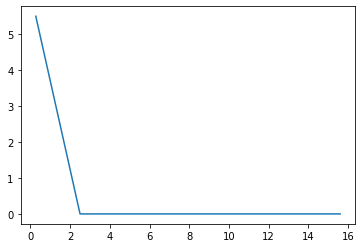

In [ ]:
trapez_errors = np.array(errors)
trapez_time = np.array(time)
plt.plot(trapez_time, trapez_errors)

**Performance of Romberg Method**

For Romberg method to achieve the necessary error, is need 4 steps in terms of iterations.The strategy for asssessing the runtime and true errors for this method is the same to Trapezoidal method


In [ ]:
romberg_errors = []
romberg_time = []

In [ ]:
%%timeit -n 1
iter = 4
matrix = np.zeros((iter, iter))
#Trapezoidal rule
h = (b - a)
matrix[0, 0] = h * (v(a) + v(b)) / 2
for j in range(1, iter):
  h /= 2
  matrix[j, 0] = matrix[j - 1, 0] / 2
  for i in range(1, 2 ** j + 1, 2):
    matrix[j, 0] += h * np.sum(v(a + i * h)) 

  #Richardson extrapolation
  for k in range(1, j + 1):
    matrix[j, k] = ((4**k)*matrix[j, k - 1] - matrix[j - 1, k - 1]) / (4**(k)-1)


true_error = abs((exact - matrix[-1,-1])/exact) * 100
print(true_error)
print('The final result is: ', matrix[-1, -1])



3.886916727394687e-08
The final result is:  200.03937669349855


We have calculated the true errors and runtime of the Romberg method, where 

$$iter = 1,2,3,4$$

In [ ]:
romberg_errors

[5.505727933876512,
 0.032422615264888544,
 6.917302795811698e-05,
 3.886916727394687e-08]

In [ ]:
romberg_time = [0.287,0.335,0.435,0.622]

**Plotting the true error vs runtime graph for Romberg method**

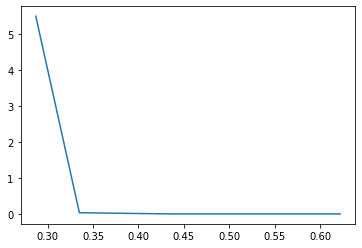

In [ ]:
romberg_errors = np.array(romberg_errors)
romberg_time = np.array(romberg_time)
plt.plot(romberg_time,romberg_errors)


**Performance of Gauss quadrature Method**

For Gauss quadrature method to achieve the necessary error, is need 4 points to be estimated in terms of Gauss-Legendre Formula.The strategy for asssessing the runtime and true errors for this method is the same to Trapezoidal method.

In [ ]:
gauss_errors = []

In [ ]:
%%timeit -n 1
a = 3
b = 9
n = 4
[t_new,c] = roots_legendre(n+1)
Integral = ((b-a)/2)*np.sum(c*v(((b-a)*t_new+(b+a))/2))
true_error = abs((exact - Integral)/exact) * 100
gauss_errors.append(true_error)
print(true_error)
print(Integral)

1.0896159203246047e-10
200.03937677147016


We have calculated the true errors and runtime of the Gauss quadrature Method  method for


*   One Points Gauss-Legendre Formula
*   Two Points Gauss-Legendre Formula
*   Three Points Gauss-Legendre Formula
*   Four Points Gauss-Legendre Formula




In [ ]:
gauss_errors

[0.021553451872546262,
 6.629025450417661e-05,
 1.080004737830632e-07,
 1.0896159203246047e-10]

In [ ]:
gauss_time = [0.370,0.375,0.342,0.680]

**Plotting the true error vs runtime graph for Gauss quadrature**

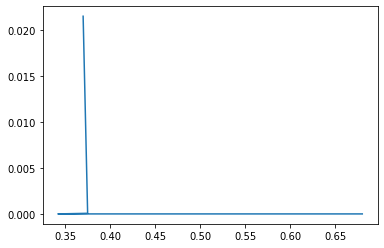

In [ ]:
gauss_errors = np.array(gauss_errors)
gauss_time = np.array(gauss_time)
plt.plot(gauss_time,gauss_errors)

**The General graph of performance(Runtime(microseconds) vs. True Error) for all three methods of calculating the Integral.**

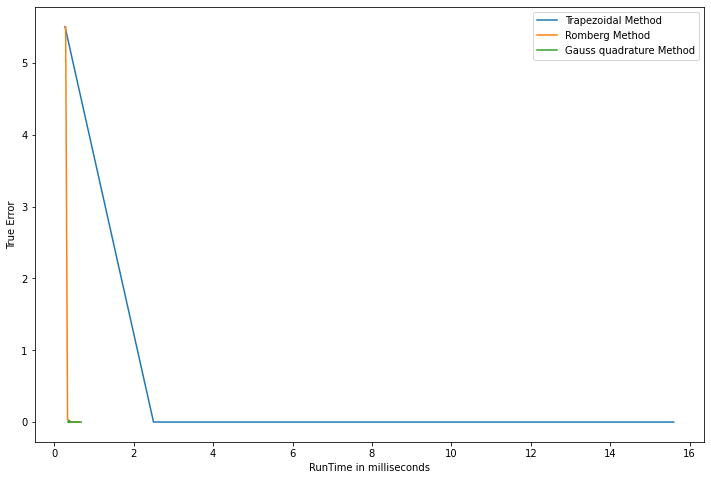

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(trapez_time, trapez_errors)
plt.plot(romberg_time,romberg_errors)
plt.plot(gauss_time,gauss_errors)
plt.legend(['Trapezoidal Method', 'Romberg Method', 'Gauss quadrature Method'], loc='best')
plt.xlabel('RunTime in milliseconds')
plt.ylabel('True Error')
plt.show()

**Results**

From the graph above, it can be seen that for high accuracy of a result the multiple-segment trapezoidal rule demands a great deal
of computational effort. While these Romberg and Gauss quadrature methods has the more accurate results at the same computational cost.In other words Romberg and Gauss quadrature achiving the better accuracy much faster that Trapezoidal rule method.So answering to the 4 and 5 question, at the computational cost $O(h^4)$, the Gauss Quadrature method is a more efficient method for a given problem, as it gives the  better precision than Trapezoidal and Romberg method has.


Errors of each method

In [ ]:
print(trapez_errors,"\n",romberg_errors,"\n",gauss_errors)
trapez_time
romberg_time
gauss_time

[5.50572793e+00 5.63652757e-06 1.40913193e-06 6.26280854e-07
 3.52283028e-07 2.25460814e-07 1.56570306e-07 1.15031274e-07
 8.80706186e-08] 
 [5.50572793e+00 3.24226153e-02 6.91730280e-05 3.88691673e-08] 
 [2.15534519e-02 6.62902545e-05 1.08000474e-07 1.08961592e-10]


Runtime of Each method

In [ ]:
print(trapez_time,"\n",romberg_time,"\n",gauss_time)

[ 0.271  2.5    3.78   5.83   7.56  10.    11.7   13.9   15.6  ] 
 [0.287 0.335 0.435 0.622] 
 [0.37  0.375 0.342 0.68 ]


**Conclusion**

To conclude, we have found that Gauss Quadrature is the most efficient method for this research problem.We also proved that Romberg and Gauss methods is particularly efficient than Trapezoidal rule at a situation where the main function is known and you can calculate the f(x) at any point.The significane of this research is related to assessment of each algorithm for its efficiency at a given problem.This assessment is important because it gives the characteristics of each method and by this characteristic the most useful and efficient algorithm can be implemented in any process of various fields.
